In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dir = "/content/gdrive/My Drive/tomato/train"
valid_dir = "/content/gdrive/My Drive/tomato/val"

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(128, 128, 3)),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
  tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
], name ="data_augmentation")

In [ ]:
import tensorflow as tf

IMG_SIZE = (128, 128)
BATCH_SIZE = 128
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE,
    seed = 123,
    shuffle = True
).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

valid_datasets = tf.keras.preprocessing.image_dataset_from_directory(
    directory = valid_dir,
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)

class_names = valid_datasets.class_names
valid_data = valid_datasets.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


In [ ]:
total_classes = len(class_names)
total_classes

10

In [ ]:
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
IMG_SIZE = (224, 224)

In [ ]:
model4 = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(total_classes, activation='softmax', name='output_layers')
])

In [ ]:
model3 = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(total_classes, activation='softmax', name='output_layers')
])

In [ ]:
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(total_classes, activation='softmax', name='output_layers')
])

In [ ]:
model2 = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(total_classes, activation='softmax', name='output_layers')
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model4.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizer,
    metrics = ['accuracy']
)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model3.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizer,
    metrics = ['accuracy']
)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizer,
    metrics = ['accuracy']
)

In [ ]:
history = model4.fit(
    train_data,
    epochs=30,
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/30
79/79 [==============================] - 1428s 8s/step - loss: 1.6312 - accuracy: 0.4748 - val_loss: 8.7159 - val_accuracy: 0.1240
Epoch 2/30
79/79 [==============================] - 539s 7s/step - loss: 1.0086 - accuracy: 0.6567 - val_loss: 3.0627 - val_accuracy: 0.2960
Epoch 3/30
79/79 [==============================] - 509s 6s/step - loss: 0.8449 - accuracy: 0.7100 - val_loss: 4.2047 - val_accuracy: 0.2210
Epoch 4/30
79/79 [==============================] - 520s 7s/step - loss: 0.7173 - accuracy: 0.7476 - val_loss: 1.2962 - val_accuracy: 0.6090
Epoch 5/30
79/79 [==============================] - 526s 7s/step - loss: 0.6816 - accuracy: 0.7656 - val_loss: 2.7305 - val_accuracy: 0.4530
Epoch 6/30
79/79 [==============================] - 503s 6s/step - loss: 0.6089 - accuracy: 0.7909 - val_loss: 2.3498 - val_accuracy: 0.5040
Epoch 7/30
79/79 [==============================] - 517s 7s/step - loss: 0.5868 - accuracy: 0.8015 - val_loss: 5.2603 - val_accuracy: 0.2490
Epoch 8/30
 

KeyboardInterrupt: ignored

In [ ]:
history = model3.fit(
    train_data,
    epochs=30,
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/30
79/79 [==============================] - 558s 7s/step - loss: 1.7733 - accuracy: 0.3773 - val_loss: 2.4363 - val_accuracy: 0.1000
Epoch 2/30
79/79 [==============================] - 515s 7s/step - loss: 1.2083 - accuracy: 0.5877 - val_loss: 3.1440 - val_accuracy: 0.1000
Epoch 3/30
79/79 [==============================] - 532s 7s/step - loss: 0.9493 - accuracy: 0.6768 - val_loss: 4.0884 - val_accuracy: 0.1000
Epoch 4/30
79/79 [==============================] - 518s 7s/step - loss: 0.8056 - accuracy: 0.7242 - val_loss: 4.3241 - val_accuracy: 0.1550
Epoch 5/30
79/79 [==============================] - 531s 7s/step - loss: 0.6957 - accuracy: 0.7642 - val_loss: 4.2890 - val_accuracy: 0.1640
Epoch 6/30
41/79 [==============>...............] - ETA: 3:54 - loss: 0.6304 - accuracy: 0.7810

KeyboardInterrupt: ignored

In [ ]:
history = model3.fit(
    train_data,
    epochs=30,
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/30
79/79 [==============================] - 563s 7s/step - loss: 1.0519 - accuracy: 0.6343 - val_loss: 4.3950 - val_accuracy: 0.1000
Epoch 2/30
79/79 [==============================] - 501s 6s/step - loss: 0.6217 - accuracy: 0.7854 - val_loss: 8.7065 - val_accuracy: 0.1070
Epoch 3/30
79/79 [==============================] - 492s 6s/step - loss: 0.4803 - accuracy: 0.8319 - val_loss: 6.7592 - val_accuracy: 0.1440
Epoch 4/30
79/79 [==============================] - 521s 7s/step - loss: 0.4006 - accuracy: 0.8615 - val_loss: 7.9217 - val_accuracy: 0.1320
Epoch 5/30
79/79 [==============================] - 513s 6s/step - loss: 0.3831 - accuracy: 0.8694 - val_loss: 5.4576 - val_accuracy: 0.2790
Epoch 6/30
79/79 [==============================] - 492s 6s/step - loss: 0.3247 - accuracy: 0.8867 - val_loss: 7.6147 - val_accuracy: 0.1950
Epoch 7/30
79/79 [==============================] - 519s 7s/step - loss: 0.2896 - accuracy: 0.8966 - val_loss: 3.0556 - val_accuracy: 0.4510
Epoch 8/30
79

In [ ]:
scores = model3.evaluate(valid_data)

8/8 [==============================] - 12s 1s/step - loss: 10.1177 - accuracy: 0.3670


In [ ]:
model.save('/content/gdrive/My Drive/SavedModels/TomatoRes42.h5')

In [ ]:
model.save('/content/gdrive/My Drive/TomatoRes42.h5')

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizer,
    metrics = ['accuracy']
)

history = model2.fit(
    train_data,
    epochs=30,
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/30
79/79 [==============================] - 1875s 23s/step - loss: 0.9835 - accuracy: 0.6553 - val_loss: 5.1191 - val_accuracy: 0.1000
Epoch 2/30
79/79 [==============================] - 1866s 24s/step - loss: 0.5046 - accuracy: 0.8252 - val_loss: 6.4337 - val_accuracy: 0.1000
Epoch 3/30


Text(0.5, 1.0, 'Accuracy')

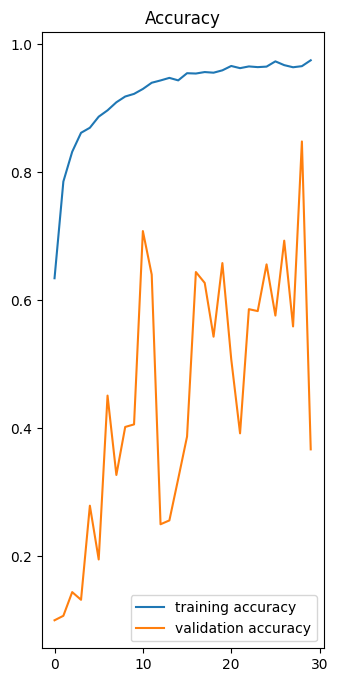

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label='training accuracy')
plt.plot(range(epochs),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title("Accuracy")

Text(0.5, 1.0, 'Loss')

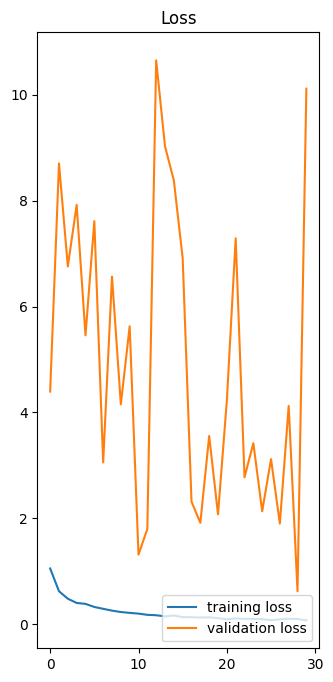

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs),loss,label='training loss')
plt.plot(range(epochs),val_loss,label='validation loss')
plt.legend(loc='lower right')
plt.title("Loss")

In [ ]:
epochs = 30
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
history = model.fit(
    train_data,
    epochs=30,
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/30
79/79 [==============================] - 1612s 6s/step - loss: 1.1959 - accuracy: 0.5844 - val_loss: 5.0822 - val_accuracy: 0.1000
Epoch 2/30
79/79 [==============================] - 341s 4s/step - loss: 0.6738 - accuracy: 0.7631 - val_loss: 11.0923 - val_accuracy: 0.1000
Epoch 3/30
79/79 [==============================] - 345s 4s/step - loss: 0.5148 - accuracy: 0.8249 - val_loss: 12.0608 - val_accuracy: 0.1000
Epoch 4/30
79/79 [==============================] - 335s 4s/step - loss: 0.4309 - accuracy: 0.8550 - val_loss: 12.6332 - val_accuracy: 0.1000
Epoch 5/30
79/79 [==============================] - 336s 4s/step - loss: 0.3833 - accuracy: 0.8698 - val_loss: 13.0575 - val_accuracy: 0.1020
Epoch 6/30
79/79 [==============================] - 328s 4s/step - loss: 0.3319 - accuracy: 0.8835 - val_loss: 15.3714 - val_accuracy: 0.1280
Epoch 7/30
79/79 [==============================] - 354s 4s/step - loss: 0.2873 - accuracy: 0.9022 - val_loss: 8.0776 - val_accuracy: 0.2500
Epoch 8

Text(0.5, 1.0, 'Accuracy')

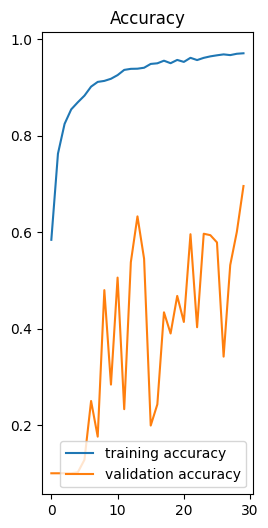

In [ ]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label='training accuracy')
plt.plot(range(epochs),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title("Accuracy")

Text(0.5, 1.0, 'Loss')

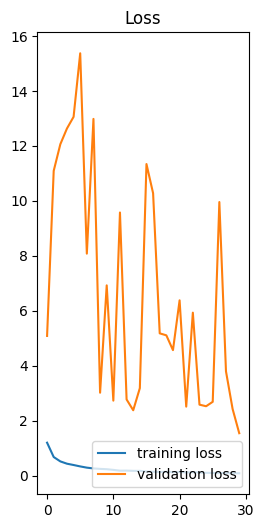

In [ ]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(range(epochs),loss,label='training loss')
plt.plot(range(epochs),val_loss,label='validation loss')
plt.legend(loc='lower right')
plt.title("Loss")

In [ ]:
newmodel = tf.keras.saving.load_model('/content/gdrive/My Drive/SavedModels/TomatoRes4.h5')

In [ ]:
newmodel.evaluate(valid_data)

8/8 [==============================] - 113s 2s/step - loss: 10.1177 - accuracy: 0.3670


[10.117718696594238, 0.367000013589859]